
# Muhammad Luthfan Lazuardi - 24060122120010


*   Nama : Muhammad Luthfan Lazuardi
*   NIM : 24060122120010
*   Lab : C1
*   Tanggal : 17 November 2024





#Import dan Definisikan

In [8]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

Penjelasan :


---


Kode di atas mengimpor berbagai pustaka yang diperlukan untuk manipulasi data, analisis statistik, dan visualisasi. Pustaka seperti pandas, numpy, matplotlib, dan seaborn digunakan untuk mengolah dan memvisualisasikan data, sedangkan sklearn menyediakan berbagai algoritma pembelajaran mesin (KNN, Decision Tree, SVM, Naive Bayes) yang digunakan untuk klasifikasi. Dataset yang digunakan adalah dataset Iris yang memuat data tentang panjang dan lebar kelopak bunga iris beserta jenis bunga tersebut, yang diunduh dari UCI Machine Learning Repository.

Prosesnya dimulai dengan memuat dataset Iris menggunakan pandas.read_csv() dan memberikan nama pada kolom-kolomnya.


---



#I. Membuat Validasi Dataset

In [10]:
# Split out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Penjelasan :


---

Tahapan di atas digunakan untuk membagi dataset menjadi dua bagian yaitu satu untuk melatih model (data pelatihan) dan satu lagi untuk menguji model (data validasi). Pertama, dataset dipisahkan menjadi dua bagian, yaitu fitur (X) yang terdiri dari kolom-kolom seperti panjang dan lebar kelopak bunga, dan target (Y) yang merupakan jenis bunga iris. Kemudian, fungsi train_test_split() dari sklearn.model_selection digunakan untuk membagi data menjadi data pelatihan dan data validasi, dengan 80% data digunakan untuk pelatihan dan 20% untuk validasi (dengan parameter test_size=0.20). Pembagian ini dilakukan secara acak dengan menggunakan nilai random_state=7 untuk memastikan hasil yang konsisten jika proses dibagi ulang.

---



#II. K-Folds Cross Validation

In [11]:
seed = 7
#seed = 42
scoring = 'accuracy'

Penjelasan :


---

Tahapan di atas menyiapkan parameter untuk melakukan K-Folds Cross Validation. Di sini, seed = 7 digunakan untuk menetapkan nilai acak yang konsisten, memastikan bahwa pembagian data untuk validasi akan selalu sama jika proses diulang. scoring = 'accuracy' digunakan untuk mengevaluasi kinerja model adalah akurasi, yaitu persentase prediksi yang benar dibandingkan dengan total prediksi.

Pada K-Folds Cross Validation, data dibagi menjadi beberapa subset (folds), dan model dilatih dan diuji beberapa kali dengan menggunakan subset yang berbeda sebagai data uji dan pelatihan. Hal tersebut memberi gambaran yang lebih seimbang mengenai kinerja model, karena setiap bagian data diuji secara bergantian.

---


#III. Membangun Model

In [12]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.983333 (0.033333)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


Penjelasan :

---

Tahapan diatas digunakan untuk melakukan Spot Check Algorithms, yaitu proses membandingkan performa beberapa algoritma klasifikasi pada dataset yang sama menggunakan K-Fold Cross Validation. Tiga model yang diuji yaitu K-Nearest Neighbors (KNN), Naive Bayes (NB), dan Support Vector Machine (SVM). Untuk setiap algoritma, dilakukan validasi silang sebanyak 10 kali lipatan dengan data pelatihan untuk mengevaluasi performa rata-rata akurasi (mean) dan penyebaran hasilnya (standard deviation).

Hasil evaluasi menunjukkan bahwa KNN dan SVM memiliki akurasi rata-rata yang sama, yaitu 98.33%, dengan tingkat variasi hasil sebesar 3.33%. Sedangkan Naive Bayes (NB) memiliki akurasi rata-rata yang sedikit lebih rendah, yaitu 96.67%, dengan variasi hasil sebesar 4.08%. Dari hasil ini, dapat dilihat bahwa KNN dan SVM memberikan performa yang sangat baik dan stabil untuk dataset Iris, sementara NB sedikit dibawah meskipun tetap memiliki performa yang cukup baik.

---


#IV. Model Support Vector Machine (SVM) dan Visualisasinya



Accuracy Score:
0.8666666666666667

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



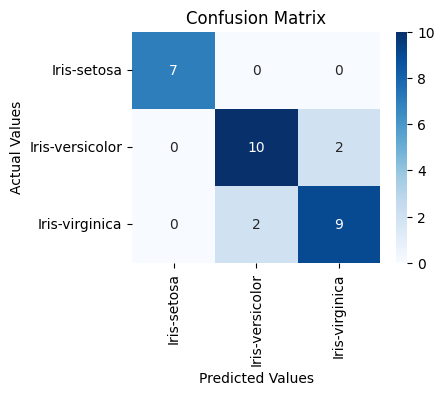

In [14]:
# Latih model SVM
svm = SVC()
svm.fit(X_train, Y_train)

# Prediksi pada data validasi
predictions = svm.predict(X_validation)

# Evaluasi performa model
print("Accuracy Score:")
print(accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:")
cm = confusion_matrix(Y_validation, predictions)
print(cm)
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Visualisasi matriks konfusi
classes = np.unique(Y_train)  # Mendapatkan label unik dari data pelatihan
cm_df = pd.DataFrame(cm, index=classes, columns=classes)  # Membuat DataFrame

# Membuat heatmap dengan Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()


Penjelasan :


---

Tahapan di atas merupakan pelatihan model Support Vector Machine (SVM) untuk mengklasifikasikan dataset Iris dan mengevaluasi kinerjanya menggunakan confusion matrix dan classification report. Confusion matrix menunjukkan bagaimana model mengklasifikasikan data dengan benar (TP) dan kesalahan klasifikasi (FP dan FN). True Positives (TP) menunjukkan jumlah prediksi yang benar untuk masing-masing kelas, seperti 7 untuk Iris-setosa, 10 untuk Iris-versicolor, dan 9 untuk Iris-virginica. False Positives (FP) adalah prediksi yang salah, misalnya tidak ada data yang diprediksi sebagai Iris-setosa padahal bukan Iris-setosa, dan seterusnya untuk kelas lain. False Negatives (FN) adalah data yang sebenarnya termasuk dalam kelas tertentu, namun diprediksi sebagai kelas lain, seperti 2 data Iris-versicolor yang diprediksi sebagai Iris-virginica.

Berdasarkan classification report, untuk precision, recall, dan f1-score untuk setiap kelas cukup tinggi. Precision untuk Iris-setosa adalah 1.00. Namun, untuk kelas Iris-versicolor dan Iris-virginica, precision masing-masing adalah 0.83 dan 0.82, yang berarti ada beberapa kesalahan dalam memprediksi kedua kelas ini. Recall untuk Iris-setosa juga 1.00, sedangkan untuk kelas lainnya, recall untuk Iris-versicolor dan Iris-virginica masing-masing 0.83 dan 0.82, yang menunjukkan ada sebagian kecil data yang tidak terklasifikasi dengan benar sebagai kelas tersebut. F1-score, yang merupakan rata-rata antara precision dan recall, juga menunjukkan nilai yang baik untuk semua kelas 1.00 untuk Iris-setosa, 0.83 untuk Iris-versicolor, dan 0.82 untuk Iris-virginica. macro avg menunjukkan nilai 0.88 untuk precision, recall, dan f1-score, sedangkan weighted avg sedikit lebih rendah di 0.87, karena distribusi kelas yang tidak seimbang, dengan Iris-versicolor memiliki jumlah data lebih banyak. Secara keseluruhan, model ini memiliki akurasi 86.67% dan menunjukkan kinerja yang baik dalam mengklasifikasikan dataset Iris.

Visualisasi heatmap dari confusion matrix juga memberikan gambaran visual yang jelas bagaimana distribusi prediksi dan kesalahan model, yang menunjukkan bahwa SVM bekerja cukup efektif dalam mengklasifikasikan data Iris meskipun ada sedikit kesalahan pada beberapa kelas.

---

#V. Model K-Nearest Neighbors (KNN) dan Visualisasinya

Menentukan nilai k terbaik untuk KNN

Nilai k terbaik: 13


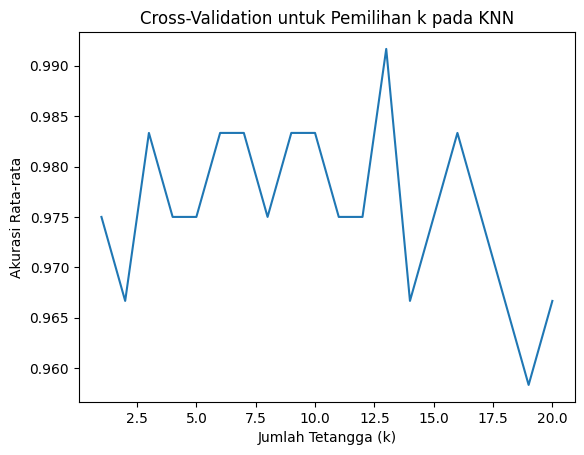

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Range jumlah tetangga (k) yang ingin diuji
k_range = range(1, 21)
cv_scores = []

# Melakukan cross-validation untuk setiap nilai k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Menampilkan nilai k terbaik
best_k = k_range[np.argmax(cv_scores)]
print(f'Nilai k terbaik: {best_k}')

# Menampilkan plot hasil cross-validation
import matplotlib.pyplot as plt
plt.plot(k_range, cv_scores)
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi Rata-rata')
plt.title('Cross-Validation untuk Pemilihan k pada KNN')
plt.show()


Penjelasan :

---

Tahapan di atas digunakan untuk menentukan nilai k terbaik dalam algoritma K-Nearest Neighbors (KNN) dengan menggunakan 5-fold cross-validation. Model KNN diuji untuk setiap nilai k dalam rentang 1 hingga 20, dan rata-rata akurasi cross-validation dihitung untuk masing-masing k. Nilai k dengan akurasi tertinggi dipilih sebagai yang terbaik menggunakan fungsi np.argmax. Selain itu, grafik dibuat untuk memvisualisasikan hubungan antara nilai k dan akurasi rata-rata, sehingga memudahkan analisis perubahan performa model berdasarkan jumlah tetangga (k) yang dipilih. Proses ini memastikan nilai k yang dipilih menghasilkan kinerja optimal pada dataset.

---



Accuracy Score :
0.9

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



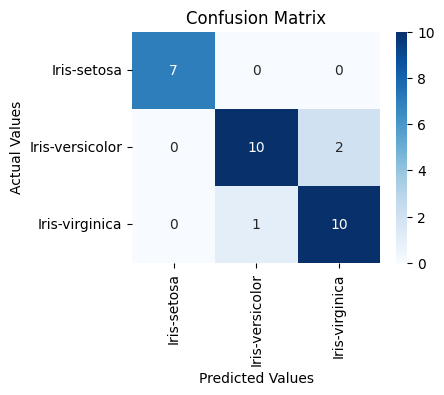

In [23]:
# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, Y_train)

# Prediksi pada data validasi
predictions = knn.predict(X_validation)

# Evaluasi performa model
print("Accuracy Score :")
print(accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:")
cm = confusion_matrix(Y_validation, predictions)
print(cm)
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Visualisasi matriks konfusi
classes = np.unique(Y_train)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Membuat heatmap dengan Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

Penjelasan :

---

Pada tahapan ini, model K-Nearest Neighbors (KNN) dilatih dengan parameter n_neighbors=13 untuk mengklasifikasikan dataset Iris. Pertama, model di-fit menggunakan data pelatihan (X_train dan Y_train). Setelah itu, model digunakan untuk melakukan prediksi pada data validasi (X_validation). Hasil prediksi ini kemudian dievaluasi menggunakan accuracy score, confusion matrix, dan classification report. Accuracy score menunjukkan bahwa model memiliki akurasi 90%. Confusion matrix memberikan gambaran tentang bagaimana model mengklasifikasikan data untuk setiap kelas seperti 7 data Iris-setosa diprediksi dengan benar (TP), 10 data Iris-versicolor diprediksi dengan benar (TP), namun ada 2 data Iris-versicolor yang diprediksi salah sebagai Iris-virginica (FN). begitu juga untuk Iris-virginica, 10 data diprediksi dengan benar (TP), tetapi ada 1 data yang salah diprediksi sebagai Iris-versicolor (FN).

Classification report menunjukkan bahwa model memiliki performa yang sangat baik dengan akurasi 90%. Precision dan recall untuk Iris-setosa mencapai 1.00, menunjukkan prediksi yang bagus untuk kelas ini. Sementara untuk Iris-versicolor dan Iris-virginica, precision berada di 0.91 dan 0.83, dan recall sekitar 0.83 dan 0.91. F1-score untuk semua kelas cukup tinggi, yaitu 1.00 untuk Iris-setosa dan sekitar 0.87 untuk kedua kelas lainnya, menunjukkan keseimbangan yang baik antara precision dan recall. Nilai macro avg dan weighted avg juga tinggi yaitu 0.91 dan 0.90 mengindikasikan performa model yang konsisten di seluruh kelas, dengan sedikit penurunan pada kelas dengan jumlah data lebih banyak.

Visualisasi heatmap dari confusion matrix juga memberikan gambaran visual yang jelas bagaimana distribusi prediksi dan kesalahan model, yang menunjukkan bahwa KNN bekerja cukup efektif dalam mengklasifikasikan data Iris meskipun ada sedikit kesalahan pada beberapa kelas.

---



#VI. Model Naive Bayes (NB) dan Visualisasinya

Accuracy Score:
0.8333333333333334

Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



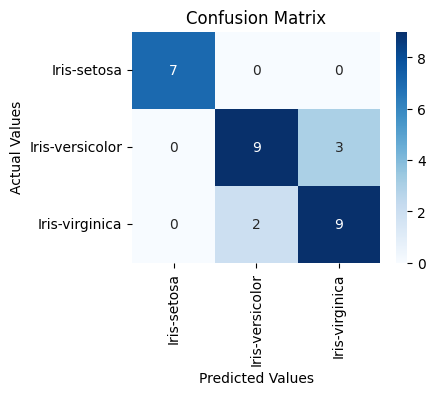

In [19]:
# Latih model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Prediksi pada data validasi
predictions = nb.predict(X_validation)

# Evaluasi performa model
print("Accuracy Score:")
print(accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:")
cm = confusion_matrix(Y_validation, predictions)
print(cm)
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Visualisasi matriks konfusi
classes = np.unique(Y_train)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Membuat heatmap dengan Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()


Penjelasan :

---

Pada tahapan ini, menggunakan model Naive Bayes (menggunakan GaussianNB) untuk mengklasifikasikan dataset Iris. Model ini kemudian dievaluasi dengan menggunakan accuracy score, confusion matrix, dan classification report. Hasil evaluasi menunjukkan bahwa model memiliki accuracy score sebesar 83.33%. Confusion matrix menggambarkan distribusi prediksi model terhadap kelas aktual. Untuk kelas Iris-setosa, model memprediksi semua data dengan benar (7 TP) sedangkan untuk Iris-versicolor dan Iris-virginica memprediksi semua data benar yaitu (9 TP). Namun, pada kelas Iris-versicolor, ada 3 data yang diprediksi salah sebagai Iris-virginica (FN), dan pada kelas Iris-virginica, ada 2 data yang diprediksi salah sebagai Iris-versicolor (FN).

Classification report memberikan metrik evaluasi seperti precision, recall, dan f1-score untuk setiap kelas. Precision untuk Iris-setosa adalah 1.00. Untuk kelas Iris-versicolor dan Iris-virginica, precision adalah 0.82 dan 0.75. Recall menunjukkan bahwa model dapat mengklasifikasikan 100% data Iris-setosa (recall 1.00), tetapi hanya dapat mengklasifikasikan 75% data Iris-versicolor (recall 0.75), dan 82% data Iris-virginica (recall 0.82). F1-score yang merupakan rata-rata dari precision dan recall, memberikan hasil yang cukup baik, dengan nilai 1.00 untuk Iris-setosa, 0.78 untuk Iris-versicolor, dan 0.78 untuk Iris-virginica. Macro avg dan weighted avg menunjukkan bahwa rata-rata performa model secara keseluruhan cukup baik, dengan nilai 0.86 untuk precision dan recall pada macro avg, serta 0.84 untuk precision dan 0.83 untuk recall pada weighted avg.

Terakhir, heatmap dari confusion matrix memberikan gambaran visual yang jelas mengenai distribusi prediksi dan kesalahan model, yang menunjukkan bahwa meskipun ada beberapa kesalahan pada kelas Iris-versicolor dan Iris-virginica, Naive Bayes masih efektif dalam mengklasifikasikan data Iris secara keseluruhan.

---
